<a href="https://colab.research.google.com/github/lolobq/ECGR-5105-Intro_To_Machine_Learning/blob/main/Homework3/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [17]:
# Generic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

In [18]:
# Import csv data from my GitHub repo
diabetes_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework3/diabetes.csv'
cancer_url = 'https://raw.githubusercontent.com/lolobq/ECGR-5105-Intro_To_Machine_Learning/master/Homework3/cancer.csv'

# Create dataframes for each url
db_df = pd.read_csv(diabetes_url)
cr_df = pd.read_csv(cancer_url)

# Display the first 5 rows of the DataFrame
# print(db_df.head())
cr_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Code for Problem 1

In [19]:
# Extract the input and output values
x1 = db_df.iloc[:, :8].values
y1 = db_df.iloc[:, 8].values

# Split the data into training and validation sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, test_size = 0.2, random_state = 0)

# Scale the data using standardization
sc_x1 = StandardScaler()
x1_train = sc_x1.fit_transform(x1_train)
x1_test = sc_x1.transform(x1_test)

In [20]:
def perform_logistic_regression(x_train, y_train, x_test, y_test):
    """
    Performs logistic regression, making predictions and creating a confusion matrix.
    Also prints the accuracy, precision, recall, and F1 score.

    Parameters:
    x_train : The input data from the training set
    y_train : The output data from the training set
    x_test : The input data from the test set
    y_test : The output data from the test set

    Returns:
    cnf_matrix : A 2D array containing true negative, false positive, false negative, and true positive (in that order)
    """
    classifier = LogisticRegression(random_state=0)
    classifier.fit(x_train, y_train)

    # Make predictions
    y_pred = classifier.predict(x_test)

    # Find confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    cnf_matrix

    # Find accuracy, precision, and recall
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 Score:", metrics.f1_score(y_test, y_pred))

    return cnf_matrix

In [21]:
def plot_confusion_matrix(confusion_matrix, neg_label, pos_label):
    """
    Plots the confusion matrix.

    Parameters:
    confusion_matrix: The 4 values for true negative, false positive, false negative, and true positive (in that order)
    """
    # Visualize the confusion matrix using a heatmap
    class_names=[neg_label, pos_label] # Name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)

    # Create heatmap
    sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


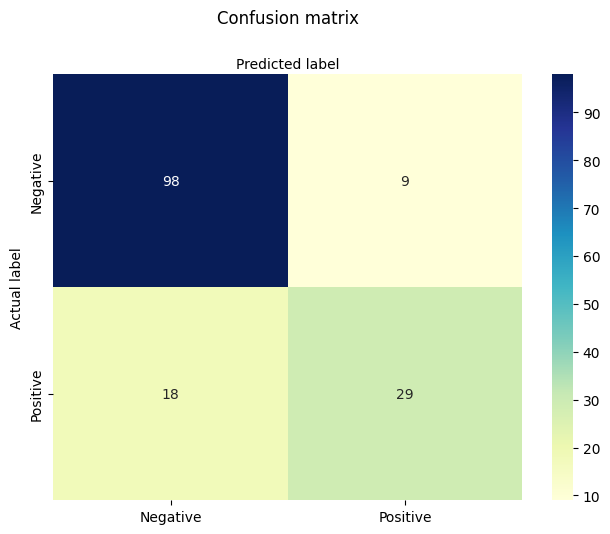

In [22]:
# Perform logistic regression and return confusion matrix
confusion_matrix_1 = perform_logistic_regression(x_train=x1_train, y_train=y1_train, x_test=x1_test, y_test=y1_test)

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_1, neg_label='Negative', pos_label='Positive')

# Code for Problem 2a

In [23]:
# Replacing the Benign and Malignant diagnoses with numbers
cr_df['diagnosis'].replace('B', 0, inplace=True)
cr_df['diagnosis'].replace('M', 1, inplace=True)

# Extract the input and output values
x2 = cr_df.iloc[:, 2:].values
y2 = cr_df.iloc[:, 1].values

# Split the data into training and validation sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size = 0.2, random_state = 0)

# Scale the data using standardization
sc_x = StandardScaler()
x2_train = sc_x.fit_transform(x2_train)
x2_test = sc_x.transform(x2_test)

print(x2)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106385


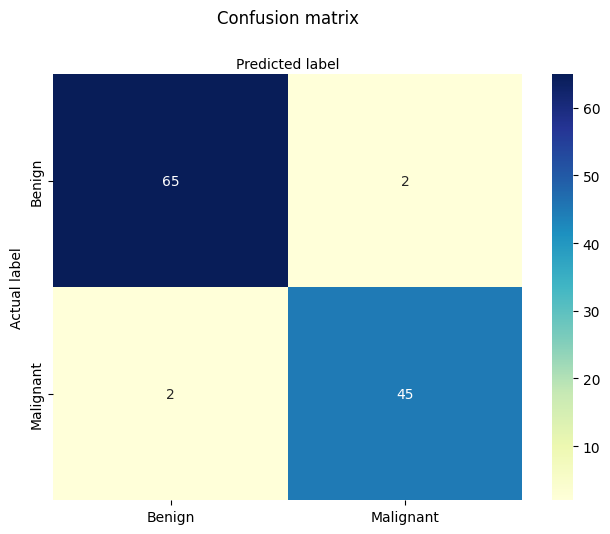

In [24]:
# Perform logistic regression and return confusion matrix
confusion_matrix_2 = perform_logistic_regression(x_train=x2_train, y_train=y2_train, x_test=x2_test, y_test=y2_test)

# Plot the confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_2, neg_label='Benign', pos_label='Malignant')

# Code for Problem 2b

In [25]:
# Adding a parameters penalty
C = [10, 5, 1, .1, .001]
x2b_train =  x2_train
x2b_test = x2_test

# Exploring different parameter penalties
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(x2b_train, y2_train)
    print('C:', c)
    print('Training accuracy:\t%5.4f' %clf.score(x2b_train, y2_train))
    print('Test accuracy:\t\t%5.4f' %clf.score(x2b_test, y2_test))
    print('')

C: 10
Training accuracy:	0.9890
Test accuracy:		0.9474

C: 5
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 1
Training accuracy:	0.9890
Test accuracy:		0.9561

C: 0.1
Training accuracy:	0.9758
Test accuracy:		0.9737

C: 0.001
Training accuracy:	0.6374
Test accuracy:		0.5877



In [26]:
# Selecting the best penalty and making the regression with it
clf = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
clf.fit(x2b_train, y2_train)
y2b_pred = clf.predict(x2b_test)

# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y2_test, y2b_pred))
print("Precision:", metrics.precision_score(y2_test, y2b_pred))
print("Recall:", metrics.recall_score(y2_test, y2b_pred))
print("F1 Score:", metrics.f1_score(y2_test, y2b_pred))

Accuracy: 0.9736842105263158
Precision: 0.9782608695652174
Recall: 0.9574468085106383
F1 Score: 0.967741935483871


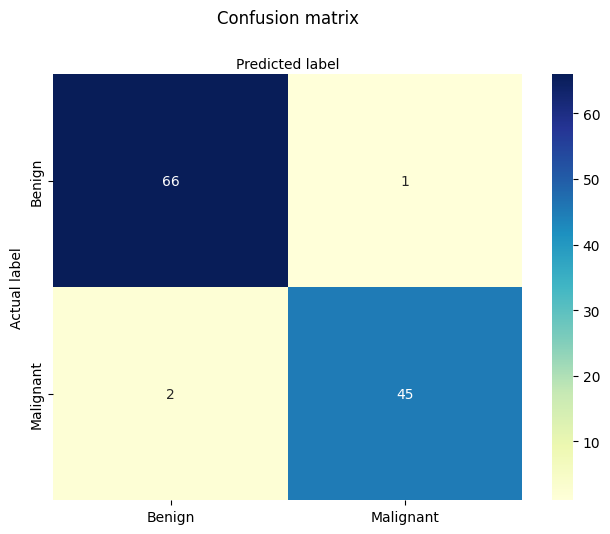

In [27]:
# Find confusion matrix
confusion_matrix_2b = confusion_matrix(y2_test, y2b_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_2b, neg_label='Benign', pos_label='Malignant')

# Code for Problem 3

In [28]:
# Create the Gaussian classifier
classifier = GaussianNB()
classifier.fit(x2_train, y2_train)
y3_pred = classifier.predict(x2_test)

# Find accuracy, precision, and recall
print("Accuracy:", metrics.accuracy_score(y2_test, y3_pred))
print("Precision:", metrics.precision_score(y2_test, y3_pred))
print("Recall:", metrics.recall_score(y2_test, y3_pred))
print("F1 Score:", metrics.f1_score(y2_test, y3_pred))

Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894


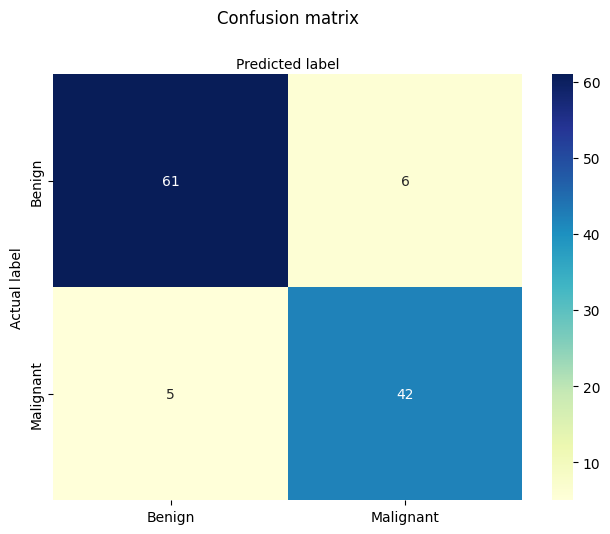

In [29]:
# Find confusion matrix
confusion_matrix_3 = confusion_matrix(y2_test, y3_pred)

# Plot confusion matrix
plot_confusion_matrix(confusion_matrix=confusion_matrix_3, neg_label='Benign', pos_label='Malignant')

# Code for Problem 4

In [30]:
# Replacing the Benign and Malignant diagnoses with numbers
cr_df['diagnosis'].replace('B', 0, inplace=True)
cr_df['diagnosis'].replace('M', 1, inplace=True)

# Extract the input and output values
x4 = cr_df.iloc[:, 2:].values
y4 = cr_df.iloc[:, 1].values

# Perform standardization
x4 = StandardScaler().fit_transform(x4)

In [31]:
# Select N values from 1 to 15
N = [i for i in range(1, 16)]

for K in N:
  # Perform PCA
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(x4))

  # Split the data into training and validation sets
  x4_train, x4_test, y4_train, y4_test = train_test_split(principalDf.values, y4, train_size = 0.8, test_size = 0.2, random_state = 0)

  # Perform regression
  classifier = LogisticRegression(random_state=0)
  classifier.fit(x4_train, y4_train)

  # Make predictions and find confusion matrix
  y4_pred = classifier.predict(x4_test)
  cnf_matrix_4 = confusion_matrix(y4_test, y4_pred)
  print(cnf_matrix_4)

  # Find accuracy, precision, and recall
  print("Accuracy:", metrics.accuracy_score(y4_test, y4_pred))
  print("Precision:", metrics.precision_score(y4_test, y4_pred))
  print("Recall:", metrics.recall_score(y4_test, y4_pred))
  print("F1 Score:", metrics.f1_score(y4_test, y4_pred))
  print('\n')

[[61  6]
 [ 5 42]]
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894


[[61  6]
 [ 2 45]]
Accuracy: 0.9298245614035088
Precision: 0.8823529411764706
Recall: 0.9574468085106383
F1 Score: 0.9183673469387754


[[61  6]
 [ 4 43]]
Accuracy: 0.9122807017543859
Precision: 0.8775510204081632
Recall: 0.9148936170212766
F1 Score: 0.8958333333333333


[[64  3]
 [ 3 44]]
Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1 Score: 0.9361702127659575


[[65  2]
 [ 3 44]]
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


[[65  2]
 [ 3 44]]
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


[[65  2]
 [ 3 44]]
Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


[[65  2]
 [ 3 44]]
Accuracy: 0.956140350877193
Precision: 0.9565

# Code for Problem 5

In [32]:
# Replacing the Benign and Malignant diagnoses with numbers
cr_df['diagnosis'].replace('B', 0, inplace=True)
cr_df['diagnosis'].replace('M', 1, inplace=True)

# Extract the input and output values
x5 = cr_df.iloc[:, 2:].values
y5 = cr_df.iloc[:, 1].values

# Perform standardization
x5 = StandardScaler().fit_transform(x5)

In [33]:
# Select N values from 1 to 15
N = [i for i in range(1, 16)]

for K in N:
  # Perform PCA
  pca = PCA(n_components=K)
  principalDf = pd.DataFrame(data = pca.fit_transform(x4))

  # Split the data into training and validation sets
  x5_train, x5_test, y5_train, y5_test = train_test_split(principalDf.values, y5, train_size = 0.8, test_size = 0.2, random_state = 0)

  # Perform regression
  classifier = GaussianNB()
  classifier.fit(x5_train, y5_train)

  # Make predictions and find confusion matrix
  y5_pred = classifier.predict(x5_test)
  cnf_matrix_5 = confusion_matrix(y5_test, y5_pred)
  print(cnf_matrix_5)

  # Find accuracy, precision, and recall
  print("Accuracy:", metrics.accuracy_score(y5_test, y5_pred))
  print("Precision:", metrics.precision_score(y5_test, y5_pred))
  print("Recall:", metrics.recall_score(y5_test, y5_pred))
  print("F1 Score:", metrics.f1_score(y5_test, y5_pred))
  print('\n')

[[61  6]
 [ 5 42]]
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894


[[62  5]
 [ 5 42]]
Accuracy: 0.9122807017543859
Precision: 0.8936170212765957
Recall: 0.8936170212765957
F1 Score: 0.8936170212765957


[[61  6]
 [ 5 42]]
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894


[[61  6]
 [ 5 42]]
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894


[[64  3]
 [ 6 41]]
Accuracy: 0.9210526315789473
Precision: 0.9318181818181818
Recall: 0.8723404255319149
F1 Score: 0.9010989010989012


[[64  3]
 [ 6 41]]
Accuracy: 0.9210526315789473
Precision: 0.9318181818181818
Recall: 0.8723404255319149
F1 Score: 0.9010989010989012


[[63  4]
 [ 6 41]]
Accuracy: 0.9122807017543859
Precision: 0.9111111111111111
Recall: 0.8723404255319149
F1 Score: 0.891304347826087


[[63  4]
 [ 6 41]]
Accuracy: 0.9122807017543859
Precision: 0.9111111111111111
Recall: 0.